In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:\\Users\\ANUSHKA.H\\Desktop\\anu cd\\edx\\train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
round((df.isnull().sum()/len(df.index)),2)*100

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

In [8]:
df= df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)

In [9]:
for item in df.columns:
    print( item, df[item].nunique())

Survived 2
Pclass 3
Sex 2
Age 88
SibSp 7
Parch 7
Fare 248
Embarked 3


In [10]:
df['Family_mem']=df['Parch']+df['SibSp']

In [11]:
new_lis=[]
for i in range(df.shape[0]):
    if df['Family_mem'].iloc[i]==0:
        new_lis.append('Alone')
    else:
        new_lis.append('With Family')
df['Family']=new_lis
df=df.drop('Family_mem',axis=1)

In [12]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [13]:
q=df['Fare'].quantile(0.95)
df=df[df['Fare']<q]

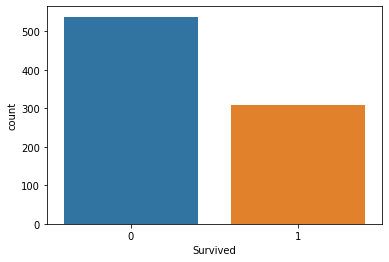

In [14]:
sns.countplot(df['Survived'])

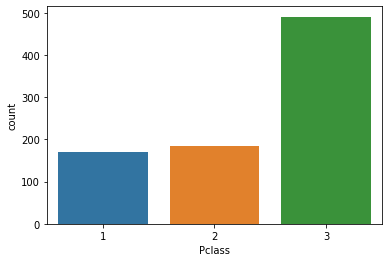

In [15]:
sns.countplot(df['Pclass'])

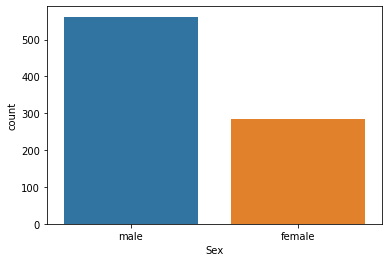

In [16]:
sns.countplot(df['Sex'])

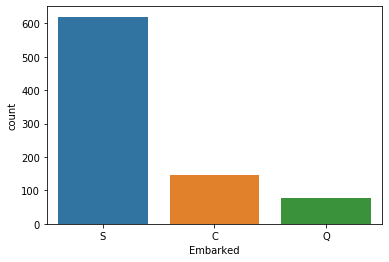

In [17]:
sns.countplot(df['Embarked'])

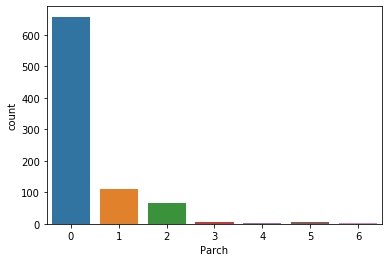

In [18]:
sns.countplot(df['Parch'])

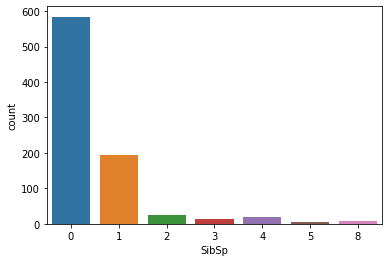

In [19]:
sns.countplot(df['SibSp'])

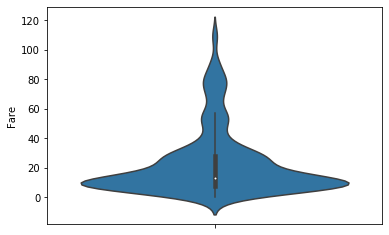

In [20]:
sns.violinplot(y= df['Fare'])

Text(0.5, 1.0, 'Survival Rates based on Fare')

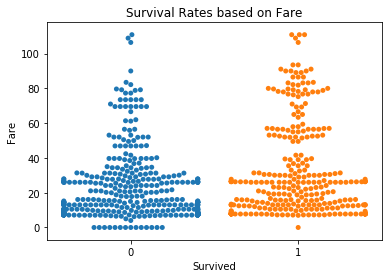

In [21]:
sns.swarmplot(y= df['Fare'], x=df['Survived'])
plt.title('Survival Rates based on Fare')

Text(0.5, 1.0, 'Survival Rates based on Fare and Classes')

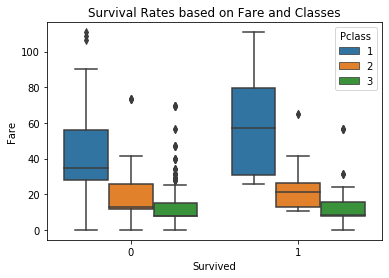

In [22]:
sns.boxplot(y= df['Fare'], x=df['Survived'], hue=df['Pclass'])
plt.title('Survival Rates based on Fare and Classes')

Text(0.5, 1.0, 'Survival Rates based on Fare and Embarked Places')

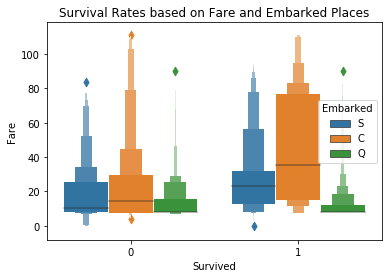

In [23]:
sns.boxenplot(y= df['Fare'], x=df['Survived'], hue=df['Embarked'])
plt.title('Survival Rates based on Fare and Embarked Places')

Text(0.5, 1.0, 'Survival Rates based on Fare and Family members')

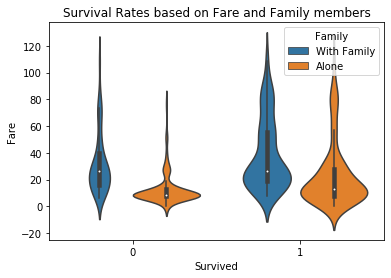

In [24]:
sns.violinplot(y= df['Fare'], x=df['Survived'], hue=df['Family'])
plt.title('Survival Rates based on Fare and Family members')

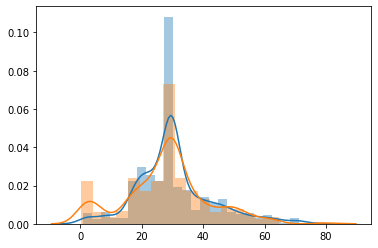

In [25]:
unique_vals = df['Survived'].unique()  

targets = [df.loc[df['Survived'] == val] for val in unique_vals]
for target in targets:
    sns.distplot(target[['Age']] )

Text(0.5, 1.0, 'Survival Rates based on Age')

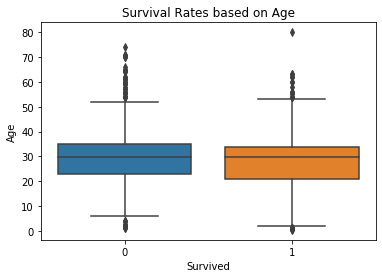

In [26]:
sns.boxplot(y= df['Age'], x=df['Survived'])
plt.title('Survival Rates based on Age')

Text(0.5, 1.0, 'Survival Rates based on Age and Classes')

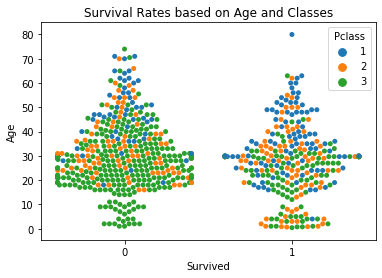

In [27]:
sns.swarmplot(y= df['Age'], x=df['Survived'], hue=df['Pclass'])
plt.title('Survival Rates based on Age and Classes')

Text(0.5, 1.0, 'Survival Rates based on Age and Embarked Places')

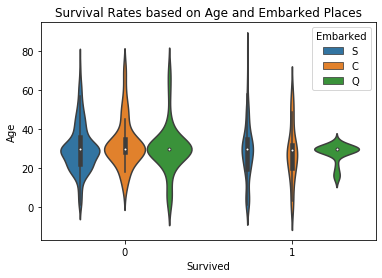

In [28]:
sns.violinplot(y= df['Age'], x=df['Survived'], hue=df['Embarked'])
plt.title('Survival Rates based on Age and Embarked Places')

Text(0.5, 1.0, 'Survival Rates based on Age and Family members')

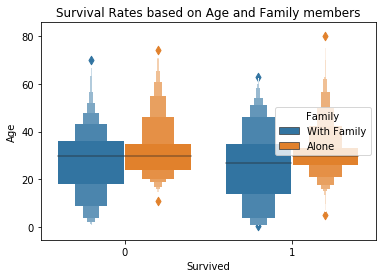

In [29]:
sns.boxenplot(y= df['Age'], x=df['Survived'], hue=df['Family'])
plt.title('Survival Rates based on Age and Family members')

Text(0.5, 1.0, 'Survival Rates based on Age and Gender')

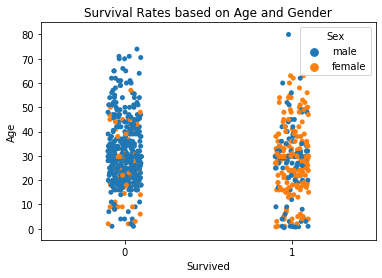

In [30]:
sns.stripplot(y= df['Age'], x=df['Survived'], hue=df['Sex'])
plt.title('Survival Rates based on Age and Gender')

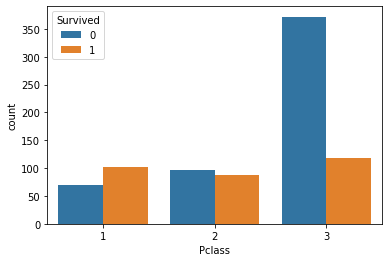

In [31]:
sns.countplot(x=df['Pclass'], hue= df['Survived'])

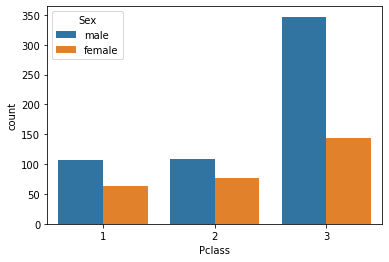

In [32]:
sns.countplot(df['Pclass'],hue=df['Sex'])

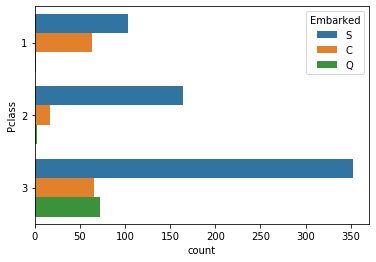

In [33]:
sns.countplot(y=df['Pclass'], hue=df['Embarked'])

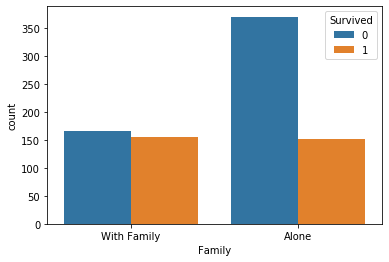

In [34]:
sns.countplot(df['Family'], hue=df['Survived'])

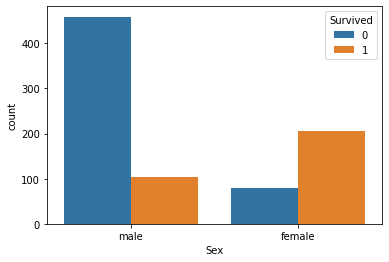

In [35]:
sns.countplot(df['Sex'],hue= df['Survived'])

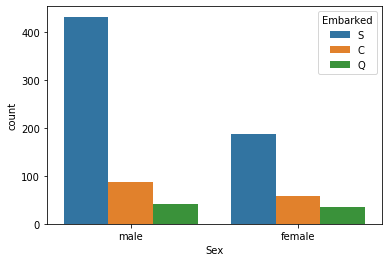

In [36]:
sns.countplot(df['Sex'],hue= df['Embarked'])

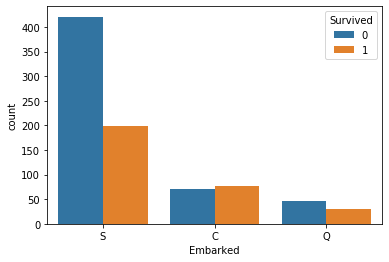

In [37]:
sns.countplot(df['Embarked'], hue=df['Survived'])

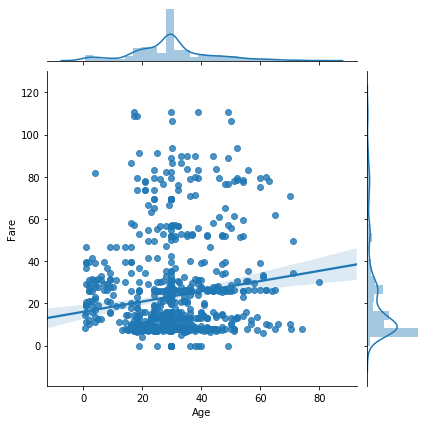

In [38]:
sns.jointplot(df['Age'],df['Fare'],kind='reg')

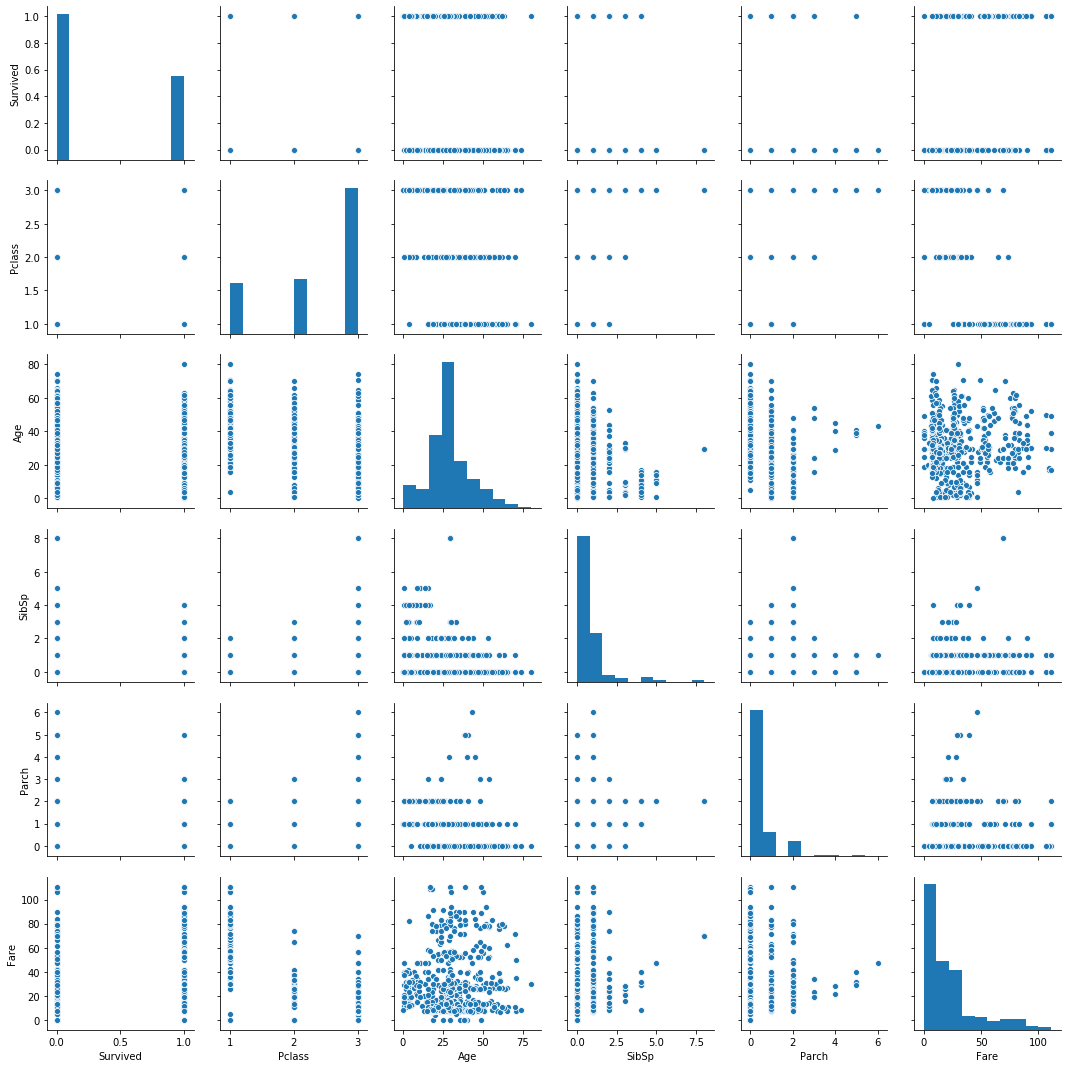

In [39]:
sns.pairplot(df)